In [116]:
import os
import random
import pickle
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [117]:
image_folder = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/images'
annotation_folder = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/annotations'
bbox_file = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl'

In [118]:
# Function to load bounding boxes from pkl file
def load_bounding_boxes(pkl_path):
    print("Loading file:", pkl_path)
    try:
        with open(pkl_path, 'rb') as file:
            bbox_dict = pickle.load(file)
        # print("dict example: ", bbox_dict['CVC-MUSCIMA_W-28_N-05_D-ideal.jpg'])
        return bbox_dict
    except Exception as e:
        print(f"Error: {e}")

# Function to convert bounding box format
def get_box_coordinates(box_info):
    """Convert origin/width/height to (x_min, y_min, x_max, y_max)."""
    x_min = box_info["origin"]["x"]
    y_min = box_info["origin"]["y"]
    x_max = x_min + box_info["width"]
    y_max = y_min + box_info["height"]
    return [x_min, y_min, x_max, y_max]

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image, boxes, color="red", width=3):
    draw = ImageDraw.Draw(image)
    for box_info in boxes:
        try:
            box_coords = get_box_coordinates(box_info)
            # print(f"Drawing box: {box_coords}")  # Debugging: Print coordinates
            draw.rectangle(box_coords, outline=color, width=width)
        except KeyError as e:
            print(f"Error in bounding box format: {e}")

In [119]:
# checking data integrity
# List all image files in the directory (supports .jpg and .png)
all_images = [os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
all_annots = [f for f in os.listdir(annotation_folder) if f.endswith('.xml')]
print(len(all_images), len(all_annots))
for im in all_images:
    if str(im+'.xml') not in all_annots:
        print(im)

140 140


In [120]:
# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
bounding_boxes_ims = list(load_bounding_boxes(bbox_file).keys())
print(len(all_images), len(bounding_boxes_ims))
for im in all_images:
    if im not in bounding_boxes_ims:
        print(im)

Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
140 140


Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
selected images:  ['CVC-MUSCIMA_W-17_N-01_D-ideal.png', 'CVC-MUSCIMA_W-36_N-10_D-ideal.png', 'CVC-MUSCIMA_W-19_N-04_D-ideal.png', 'CVC-MUSCIMA_W-40_N-04_D-ideal.png']
Processing image: CVC-MUSCIMA_W-17_N-01_D-ideal.png
Found 843 bounding box(es) for CVC-MUSCIMA_W-17_N-01_D-ideal.png


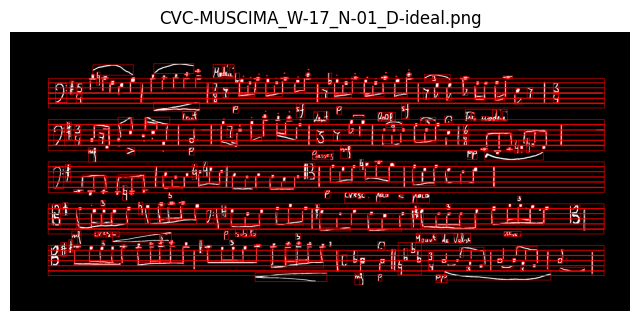

Processing image: CVC-MUSCIMA_W-36_N-10_D-ideal.png
Found 801 bounding box(es) for CVC-MUSCIMA_W-36_N-10_D-ideal.png


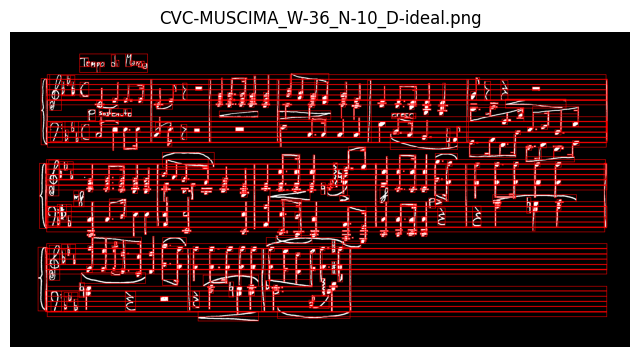

Processing image: CVC-MUSCIMA_W-19_N-04_D-ideal.png
Found 915 bounding box(es) for CVC-MUSCIMA_W-19_N-04_D-ideal.png


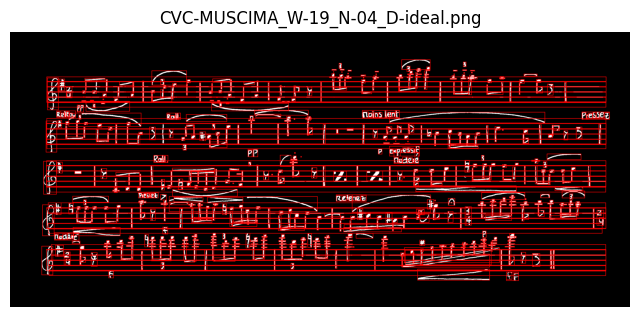

Processing image: CVC-MUSCIMA_W-40_N-04_D-ideal.png
Found 991 bounding box(es) for CVC-MUSCIMA_W-40_N-04_D-ideal.png


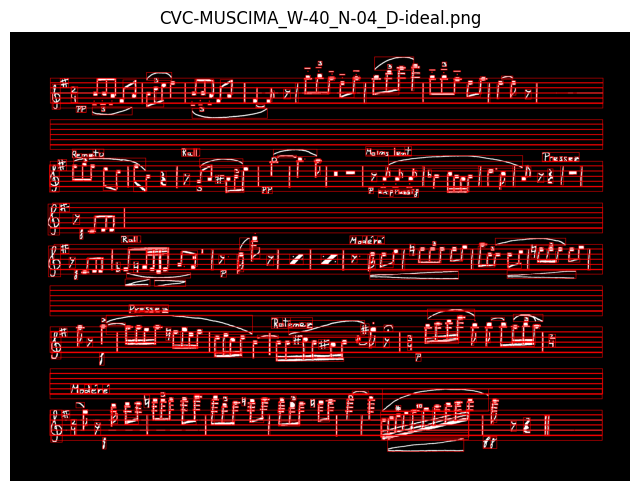

In [121]:
# Load bounding boxes
bounding_boxes = load_bounding_boxes(bbox_file)

# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]


# Randomly select up to 4 images
selected_images = random.sample(all_images, 4)
print("selected images: ", selected_images)

# Display each image individually
for img_name in selected_images:
    print(f"Processing image: {img_name}")  # Debugging: Print image name
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path).convert("RGB")
    
    
    # Get bounding boxes for the image (default to empty list if not found)
    boxes = bounding_boxes[img_name]
    
    # if isinstance(boxes, dict):  # Single box case
    #     boxes = [boxes]
    
    print(f"Found {len(boxes)} bounding box(es) for {img_name}")  # Debugging: Print number of boxes
    
    # Draw bounding boxes
    draw_bounding_boxes(img, boxes, color="red")
    
    # Display the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()


Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
selected images:  ['CVC-MUSCIMA_W-32_N-20_D-ideal.png', 'CVC-MUSCIMA_W-50_N-08_D-ideal.png', 'CVC-MUSCIMA_W-49_N-05_D-ideal.png', 'CVC-MUSCIMA_W-30_N-13_D-ideal.png']
Processing image: CVC-MUSCIMA_W-32_N-20_D-ideal.png
Found 816 bounding box(es) for CVC-MUSCIMA_W-32_N-20_D-ideal.png


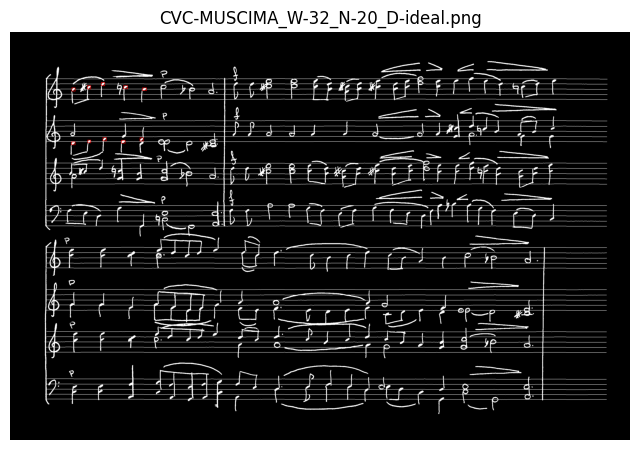

Processing image: CVC-MUSCIMA_W-50_N-08_D-ideal.png
Found 779 bounding box(es) for CVC-MUSCIMA_W-50_N-08_D-ideal.png


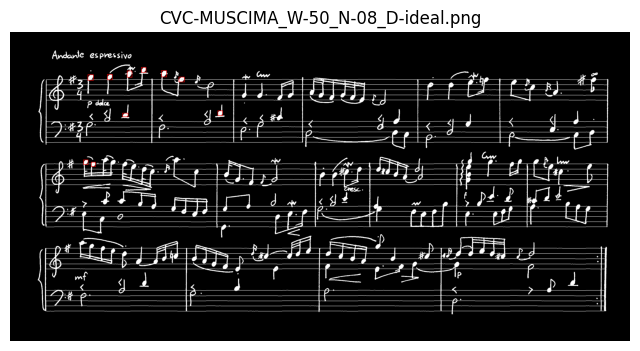

Processing image: CVC-MUSCIMA_W-49_N-05_D-ideal.png
Found 709 bounding box(es) for CVC-MUSCIMA_W-49_N-05_D-ideal.png


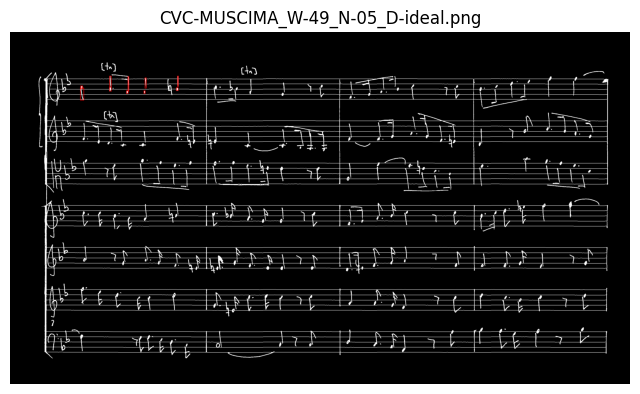

Processing image: CVC-MUSCIMA_W-30_N-13_D-ideal.png
Found 691 bounding box(es) for CVC-MUSCIMA_W-30_N-13_D-ideal.png


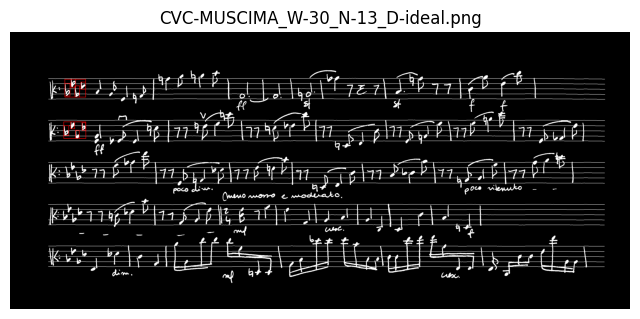

In [122]:
# Load bounding boxes
bounding_boxes = load_bounding_boxes(bbox_file)

# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]


# Randomly select up to 4 images
selected_images = random.sample(all_images, 4)
print("selected images: ", selected_images)

# Display each image individually
for img_name in selected_images:
    print(f"Processing image: {img_name}")  # Debugging: Print image name
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path).convert("RGB")
    
    
    # Get bounding boxes for the image (default to empty list if not found)
    boxes = bounding_boxes[img_name]
    
    # if isinstance(boxes, dict):  # Single box case
    #     boxes = [boxes]
    
    print(f"Found {len(boxes)} bounding box(es) for {img_name}")  # Debugging: Print number of boxes
    
    # Draw bounding boxes
    draw_bounding_boxes(img, boxes[:10], color="red")
    
    # Display the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()
